In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import re
import nltk.corpus
from nltk import word_tokenize
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer

In [7]:
from nltk.corpus import stopwords
from string import punctuation

In [5]:
data = pd.read_csv("F:\\dlk_data\\12.08.21\\Depression.csv")

In [6]:
data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
data.describe()

,Unnamed: 0,label
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10314 non-null  int64 
 1   message     10314 non-null  object
 2   label       10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


### data cleaning

In [11]:
data.isnull().sum()

Unnamed: 0    0
message       0
label         0
dtype: int64

In [12]:
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,message,label
8471,800471,Tim Duncan retirement depression Day 653 <Emoj...,1
2817,288277,@Chaelala Happy birthday Chaela! Love yoooooous.,0
7672,765901,photo's done. off to graphics. long. long day ...,0
578,58814,#derunkah-Twitter ;) woooooooo! Downtown enjoy...,0
6339,630157,@lancearmstrong my car died 2 years ago now an...,0


###  removing the UNnamed column

In [14]:
df = data.drop(["Unnamed: 0"], axis = 1)

In [15]:
df

,message,label
8471,Tim Duncan retirement depression Day 653 <Emoj...,1
2817,@Chaelala Happy birthday Chaela! Love yoooooous.,0
7672,photo's done. off to graphics. long. long day ...,0
578,#derunkah-Twitter ;) woooooooo! Downtown enjoy...,0
6339,@lancearmstrong my car died 2 years ago now an...,0
...,...,...
1595,Delonge Day,0
10127,@JustinePHAC @agnosticQuest @onfiremission The...,1
6509,@YoungQ I have made several close friends beca...,0
3890,Got my BB bac!!! Now I can function,0


###  converting to lower case in column message

In [16]:
df['message'] = df['message'].astype(str).str.lower()

###  removing punctuation and stopwords

In [18]:
def pun(s):
    return ''.join(c for c in s if c not in punctuation)
df['message'] = df['message'].apply(lambda x: pun(x))
df.head()

,message,label
8471,tim duncan retirement depression day 653 emoji...,1
2817,chaelala happy birthday chaela love yoooooous,0
7672,photos done off to graphics long long day nite,0
578,derunkahtwitter woooooooo downtown enjoying t...,0
6339,lancearmstrong my car died 2 years ago now and...,0


In [19]:
#Lemmatization with stopwords removal and tokenization
from nltk.corpus import stopwords
#stopwords=stopwords.words('english')
stopwords = stopwords.words('english')


In [20]:
#import packagees
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk.corpus
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer

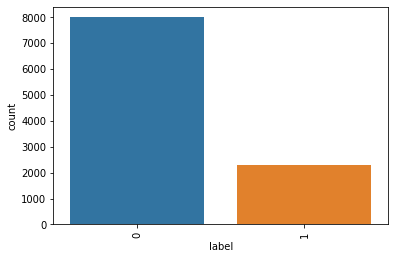

In [21]:
sns.countplot(x='label',data=df)
plt.xticks(rotation=90)
plt.show()

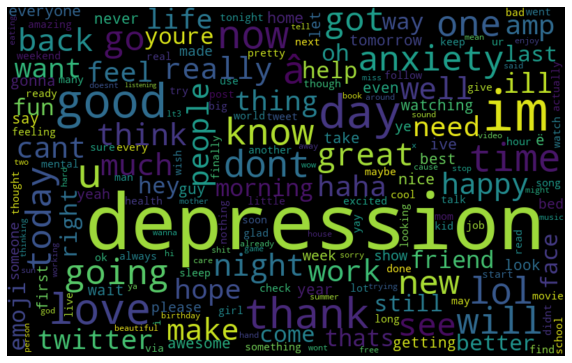

In [23]:
from wordcloud import WordCloud

df2 = df[df["label"] == "1"]
all_words = ' '.join([text for text in df.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

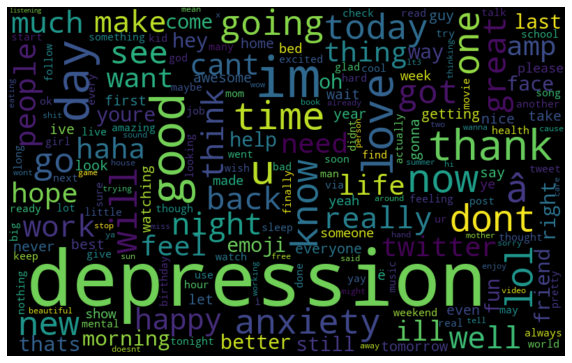

In [24]:
from wordcloud import WordCloud

df2 = df[df["label"] == "0"]
all_words = ' '.join([text for text in df.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### modelling

In [25]:
from stop_words import get_stop_words

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time
from sklearn import __version__ as sklearn_version
from sklearn.pipeline import make_pipeline
import os, time
from sklearn.pipeline import Pipeline
#pip install stop_words

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['message'], df.label, test_size=0.2, random_state = 0)

### naive bayes

In [28]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 86.52%


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
cm

array([[1597,    2],
       [ 276,  188]], dtype=int64)

###  logistic regrerssion

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.84%


In [31]:
cm = confusion_matrix(y_test,prediction)
cm

array([[1599,    0],
       [  24,  440]], dtype=int64)

###  SVM

In [32]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.42%


In [33]:
cm = confusion_matrix(y_test,prediction)
cm

array([[1599,    0],
       [  12,  452]], dtype=int64)

###  Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.36%


In [35]:
ca = confusion_matrix(y_test,prediction)
ca

array([[1531,   68],
       [  69,  395]], dtype=int64)